In [2]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("100419_main_input.csv", parse_dates = ['date'])
df.head(2)

,date,price,month,year,day_of_week,100414,100415,100416,100442,100448,100458,100462,100467,100476,101448
0,2019-12-05,1280.0640,12,2019,3,1276.3752,1273.1431,1283.8037,1282.1858,1285.4796,1288.9269,1280.4603,1282.5865,1292.0920,1286.2476
1,2019-12-06,1275.9003,12,2019,4,1271.0579,1269.7292,1278.9882,1279.1871,1282.1477,1286.1161,1277.9297,1277.9011,1284.2635,1283.0789


In [3]:
df[['price']].describe()

,price
count,1429.000000
mean,1415.840776
std,206.604971
min,765.180600
25%,1262.777963
50%,1417.617754
75%,1562.433975
max,2217.596225


### Price charts

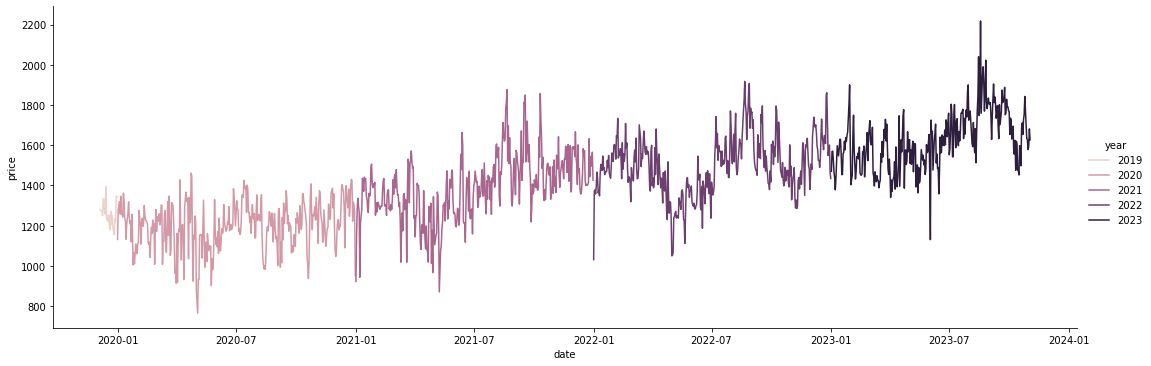

In [4]:
# whole date linechart 
p = sns.relplot(kind='line', data=df, x='date', y='price', hue='year', aspect=3)

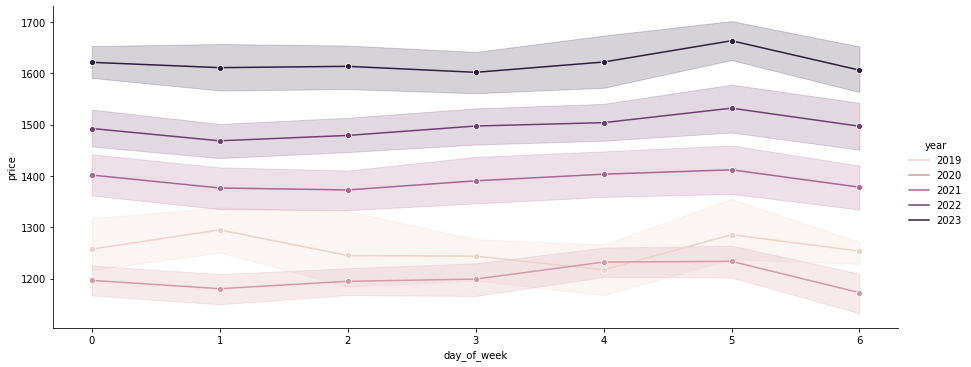

In [7]:
 p = sns.relplot(kind='line', data=df, x='day_of_week', y='price', hue='year', aspect=2.5, marker='o')

### Trendline

<Axes: ylabel='price'>

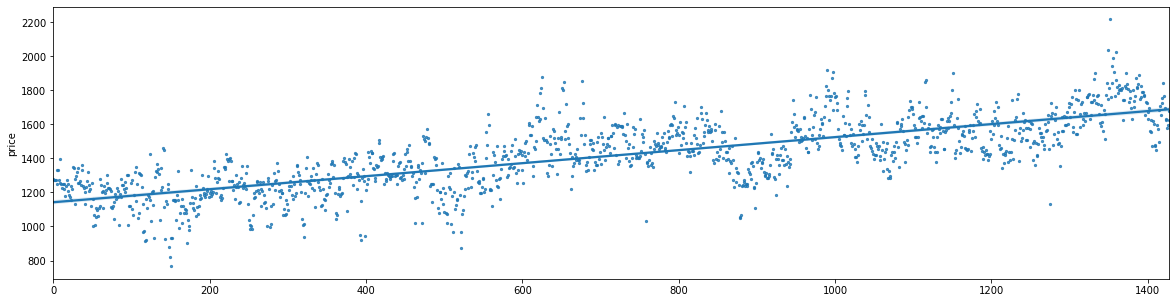

In [8]:
# Trendline
plt.figure(figsize=(20,5))
sns.regplot(x=df.index.values, y=df['price'], scatter_kws={'s':5})

<Axes: ylabel='price'>

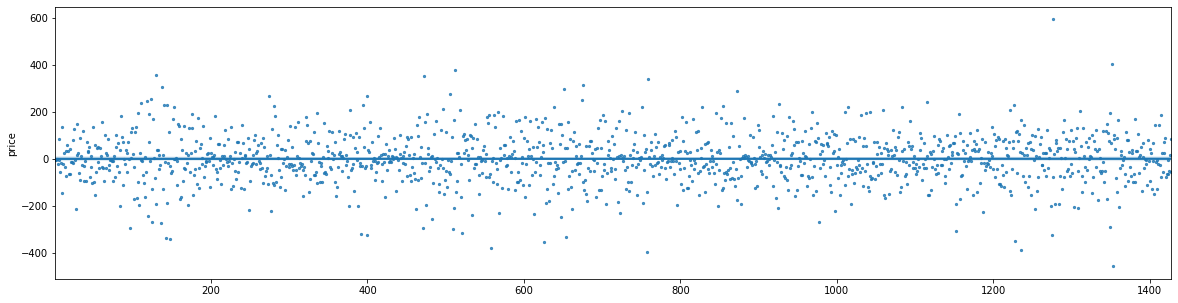

In [8]:
# Removing trend by differrentiating with period of 1
plt.figure(figsize=(20,5))
sns.regplot(x=df.index.values, y=df['price'].diff(periods=1), scatter_kws={'s':5})

### Price dependencies

<Axes: xlabel='month'>

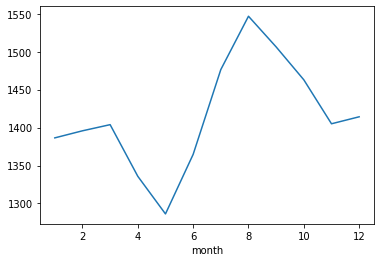

In [10]:
### Average price per month 
df.groupby('month')['price'].mean().plot()

<Axes: xlabel='day_of_week'>

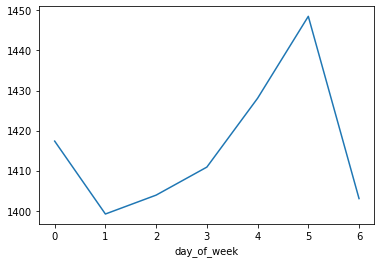

In [11]:
### Average price per week day 
df.groupby('day_of_week')['price'].mean().plot()

### Scatterplots - lagplots

<Axes: xlabel='lag1', ylabel='price'>

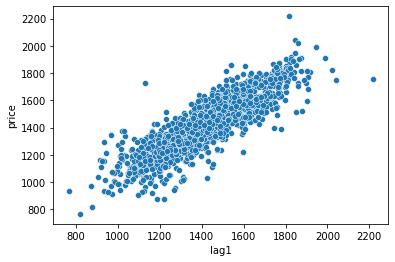

In [12]:
df['lag1'] = df['price'].shift(1)  # lag plot a day ago
sns.scatterplot(x=df['lag1'], y=df['price'])

<Axes: xlabel='lag7', ylabel='price'>

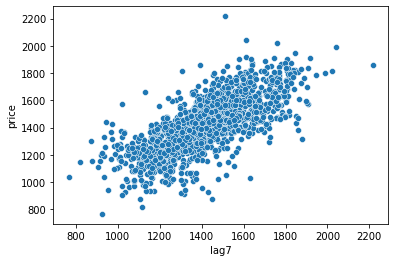

In [13]:
df['lag7'] = df['price'].shift(7)  # lag plot a week ago
sns.scatterplot(x=df['lag7'], y=df['price'])

<Axes: xlabel='lag365', ylabel='price'>

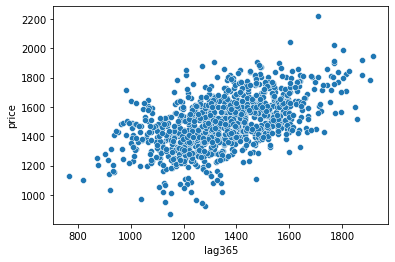

In [7]:
df['lag365'] = df['price'].shift(365)  # lag plot a year ago (366 days)
sns.scatterplot(x=df['lag365'], y=df['price'])

### Autocorrelation

In [15]:
from pandas.plotting import autocorrelation_plot as ap

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

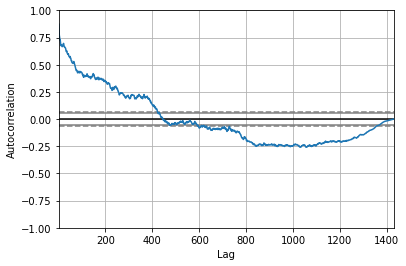

In [16]:
ap(df['price']) # daily lag correlation

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

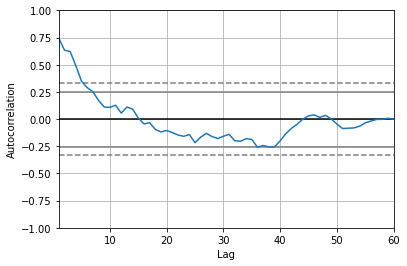

In [26]:
ap(df['price'][-60:]) # daily lag correlation (2 months data) 